In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [2]:
from sklearn.datasets import make_blobs

Text(0, 0.5, '특성 1')

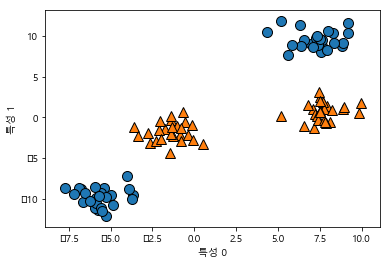

In [44]:
X,y=make_blobs(centers=4, random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [43]:
from matplotlib import font_manager
font_fname="C:/Windows/Fonts/malgun.TTF" # 아무한글 글꼴이든 OK
font_family= font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print('버전 :',mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())
print('설정 파일 위치: ', mpl.matplotlib_fname())

버전 : 3.0.3
설치 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Affinity\.matplotlib
캐시 위치:  C:\Users\Affinity\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [16]:
font_list=fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]


1004


In [22]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

[('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICBI.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('MJemokGothic', 'C:\\Windows\\Fonts\\MK.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICI.TTF'),
 ('Franklin Gothic Demi', 'C:\\WINDOWS\\Fonts\\FRADMIT.TTF'),
 ('Showcard Gothic', 'C:\\Windows\\Fonts\\SHOWG.TTF'),
 ('Franklin Gothic Demi', 'C:\\WINDOWS\\Fonts\\FRADM.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Franklin Gothic Medium Cond', 'C:\\WINDOWS\\Fonts\\FRAMDCN.TTF'),
 ('Franklin Gothic Demi Cond', 'C:\\Windows\\Fonts\\FRADMCN.TTF'),
 ('HYGothic-Medium', 'C:\\Windows\\Fonts\\H2GTRM.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framdit.ttf'),
 ('Copperplate Gothic Bold', 'C:\\Windows\\Fonts\\COPRGTB.TTF'),
 ('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABKIT.TTF'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.T

In [23]:
path='C:\\Windows\\Fonts\\malgun.ttf'
fontprop=fm.FontProperties(fname=path, size=10)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

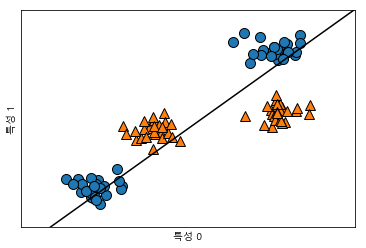

In [31]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1**2')

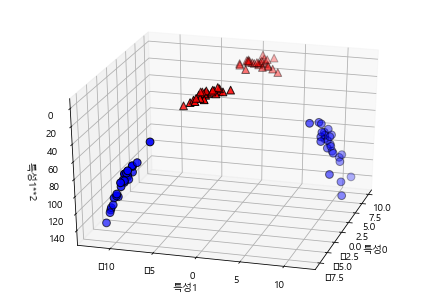

In [45]:
#두 번째 특성을 제곱하여 추가
X_new=np.hstack([X, X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

#3차원 그래프
ax=Axes3D(figure, elev=-152, azim=-16)
#y==0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그립니다.
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1**2')

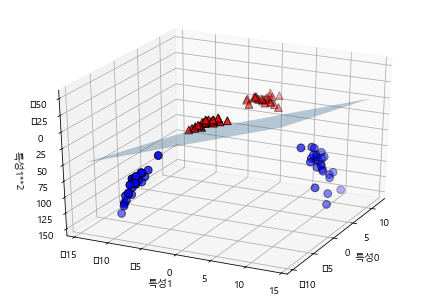

In [34]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure=plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

Text(0, 0.5, '특성 1')

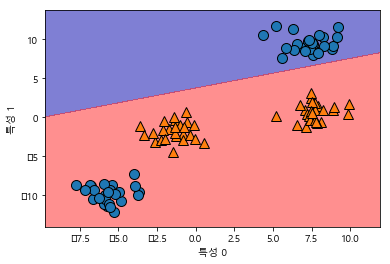

In [36]:
ZZ=YY*2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성1')

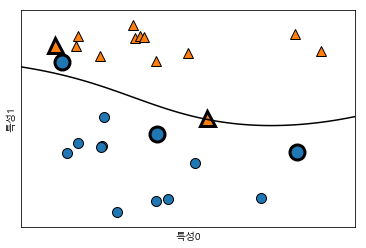

In [39]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
#데이터 포인터 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv=svm.support_vectors_
#dual_coef_의 부호에 의해 서포터 벡터의 클래스 레이블이 결정됩니다.
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")

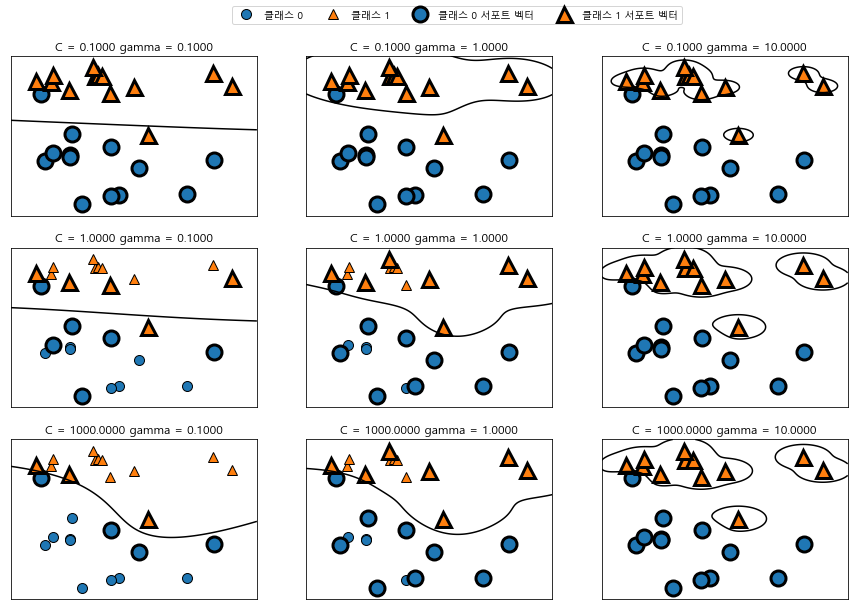

In [40]:
fig, axes=plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터",
                 "클래스 1 서포트 벡터"],ncol=4, loc=(.9, 1.2))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

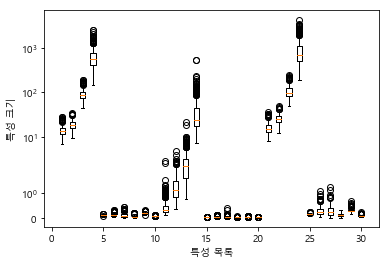

In [48]:
plt.boxplot(X_train,manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [50]:
#훈련 세트에서 특성별 최솟값 계산
min_on_training=X_train.min(axis=0)
#훈련 세트에서 특성별 (최댓값-최솟값) 계신
range_on_training=(X_train-min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면
#각 특성에 대해 최솟값은 0, 최댓값은 1입니다.
X_train_scaled=(X_train-min_on_training)/range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [51]:
X_test_scaled=(X_test-min_on_training)/range_on_training

svc=SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
svc=SVC(C=1000)

In [53]:
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
from numpy import *

def loadDataSet():
    postingList=[['my','dog','has','flea','problems','help','please'],
                ['maybe','not','take','him','to','dog','park','stupid'],
                 ['my','dalmation','is','so','cute','I','love','him'],
                 ['stop','posting','stupid','worthless','garbage'],
                 ['mr','licks','ate','my','steak','how','to','stop','him'],
                 ['quit','buying','worthless','dog','food','stupid']]
    classVec=[0,1,0,1,0,1] #1 is abusive(폭력적), 0 not (비폭력적)
    return postingList,classVec

def createVocabList(dataSet):
    vocabSet=set([]) #create empty set
                    # 이 변수에 각 문서로부터 새로운 집합 유형의 변수를 생성하여 첨부
    for document in dataSet:
        vocabSet=vocabSet|set(document) # union of the two sets
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec=[0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]=1
        else: print("the word: {} is not in my Vocabulary!".format(word))
    return returnVec

In [83]:
list0Posts, listClasses = loadDataSet()

In [103]:
list0Posts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [85]:
myVocabList=createVocabList(list0Posts)

In [86]:
myVocabList

['so',
 'to',
 'how',
 'quit',
 'please',
 'him',
 'maybe',
 'stop',
 'mr',
 'dalmation',
 'take',
 'help',
 'park',
 'my',
 'food',
 'dog',
 'cute',
 'not',
 'has',
 'steak',
 'worthless',
 'problems',
 'stupid',
 'I',
 'licks',
 'is',
 'love',
 'posting',
 'flea',
 'ate',
 'garbage',
 'buying']

In [104]:
setOfWords2Vec(myVocabList, list0Posts[0])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [105]:
def trainNBO(trainMatrix,trainCategory):
    numTrainDocs=len(trainMatrix)
    numWords=len(trainMatrix[0])
    pAbusive=sum(trainCategory)/float(numTrainDocs)
    p0Num=zeros(numWords)
    p1Num=zeros(numWords)
    p0Denom=0.0
    p1Denom=0.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
            p1Denom+=sum(trainMatrix[i])
        else:
            p0Num+=trainMatrix[i]
            p0Denom+=sum(trainMatrix[i])
    p1Vect=(p1Num/p1Denom)
    p0Vect=(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

In [112]:
trainMat=[]
for postinDoc in list0Posts:
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))

In [113]:
p0V,p1V,pAb=trainNBO(trainMat,listClasses)

In [108]:
pAb

0.5

In [109]:
p0V

array([0.04166667, 0.04166667, 0.04166667, 0.        , 0.04166667,
       0.08333333, 0.        , 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.04166667, 0.        , 0.125     , 0.        ,
       0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.        , 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.        , 0.        ])

In [110]:
p1V

array([0.        , 0.05263158, 0.        , 0.05263158, 0.        ,
       0.05263158, 0.05263158, 0.05263158, 0.        , 0.        ,
       0.05263158, 0.        , 0.05263158, 0.        , 0.05263158,
       0.10526316, 0.        , 0.05263158, 0.        , 0.        ,
       0.10526316, 0.        , 0.15789474, 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.        , 0.        ,
       0.05263158, 0.05263158])

In [94]:
trainMat

[[0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0],
 [0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1]]

In [96]:
listClasses

[0, 1, 0, 1, 0, 1]

In [111]:
def trainNBO(trainMatrix,trainCategory):
    numTrainDocs=len(trainMatrix)
    numWords=len(trainMatrix[0])
    pAbusive=sum(trainCategory)/float(numTrainDocs)
    p0Num=ones(numWords) #단어개수 1로초기화
    p1Num=ones(numWords)
    p0Denom=2.0 #분모초기화
    p1Denom=2.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
            p1Denom+=sum(trainMatrix[i])
        else:
            p0Num+=trainMatrix[i]
            p0Denom+=sum(trainMatrix[i])
    p1Vect=log(p1Num/p1Denom) #log를 씌워 언더플로우 막음
    p0Vect=log(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

In [114]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1) #element-wise mult
    p0=sum(vec2Classify*p0Vec)+log(1.0-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [117]:
def testingNB():
    list0Posts,listClassess=loadDataSet()
    testEntry=['love','my','dalmation','jinman']
    thisDoc=array(setOfWords2Vec(myVocabList,testEntry))
    print("{} classified as: {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))
    testEntry=['stupid','garbage']
    thisDoc=array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as: {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))

In [118]:
testingNB()

the word: jinman is not in my Vocabulary!
['love', 'my', 'dalmation', 'jinman'] classified as: 0
['stupid', 'garbage'] classified as: 1


In [ ]:
## ROC 그리기 ##

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [121]:
data_X, class_label=make_classification(n_samples=1000,n_classes=2,
                                       weights=[1,1],random_state=1)

In [122]:
trainX, testX, trainy, testy=train_test_split(data_X, class_label,
                                             test_size=0.3, random_state=1)

In [124]:
model=KNeighborsClassifier()
model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [125]:
probs=model.predict_proba(testX)
probs=probs[:,1]

In [126]:
roc=roc_curve(testy,probs)
print('ROC: {}'.format(roc))
auc=roc_auc_score(testy,probs)
print('AUC: %.2f'% auc)

ROC: (array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC: 0.91


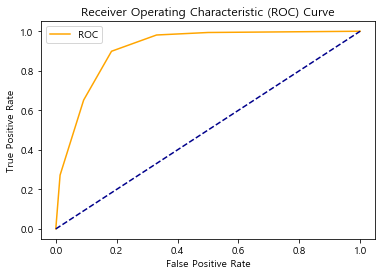

In [128]:
fpr, tpr, thresholds=roc_curve(testy,probs)
plot_roc_curve(fpr, tpr)

In [132]:
data_X, class_label=make_classification(n_samples=100,n_classes=2, weights=[1,1],random_state=1)

In [133]:
train_test_split(data_X, class_label,
                                             test_size=0.3, random_state=1)

[array([[-0.2407005 ,  1.21622362,  2.36973019, ...,  1.119899  ,
         -2.04820046,  1.17524499],
        [ 0.37167029, -0.95543218, -0.1484898 , ..., -0.6294416 ,
          0.14225137,  0.78002714],
        [-1.18231813, -0.70726877, -0.31098498, ...,  0.67471153,
         -1.67419581, -0.86131636],
        ...,
        [ 1.10861676, -1.14284069,  0.78046993, ..., -0.23787527,
          0.72555052, -0.09243232],
        [ 0.14164054, -1.27406042,  1.71066184, ...,  0.98635218,
         -0.59566788,  0.66168108],
        [-2.79144404,  0.81169128, -2.26261533, ..., -0.48272686,
          0.45271362, -0.03848246]]),
 array([[ 7.20685935e-01,  8.55262502e-01, -5.64163931e-01,
          7.99240871e-01, -2.16062800e+00, -5.97162855e-01,
          5.83718840e-02,  5.20812199e-01,  4.06655649e-01,
          1.33153252e+00, -1.54544764e+00,  9.03709433e-01,
         -1.32549127e+00, -1.15197777e+00, -1.32349843e+00,
         -1.16567424e-01,  5.07251585e-01, -8.00787040e-01,
          1.6

In [136]:
model=KNeighborsClassifier()

In [137]:
model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [142]:
model.predict_proba(testX)

array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. ,

array([0. , 0.8, 0. , 0.2, 1. , 0.8, 0.6, 1. , 0.8, 0.2, 1. , 0.8, 0. ,
       0.4, 1. , 0.2, 0.4, 0. , 1. , 0. , 0. , 0.4, 0.8, 0.6, 0.6, 0.8,
       0. , 0.4, 0.6, 0.6, 0.2, 0.2, 0.6, 0.8, 0.4, 0. , 0.2, 0.4, 1. ,
       0.2, 0. , 0.8, 0. , 0.8, 0.8, 0. , 1. , 0.8, 0.4, 0. , 0. , 0.6,
       0. , 0. , 0. , 0. , 0.6, 1. , 0.4, 0. , 1. , 0.4, 0.6, 0. , 0.6,
       0.4, 0. , 0.6, 0.8, 0.6, 1. , 0. , 0.4, 0. , 0.2, 1. , 0. , 0.8,
       0.8, 0.6, 0. , 0. , 0.6, 0.8, 0.6, 0.8, 0. , 0. , 0.2, 0.8, 0.2,
       0.4, 0.6, 0. , 0.8, 0.4, 0.8, 0.6, 0. , 0. , 1. , 0. , 1. , 0. ,
       0. , 1. , 0.6, 1. , 0.4, 0.6, 1. , 0. , 1. , 0.6, 0.8, 0.6, 0.8,
       0. , 0.6, 0. , 0. , 0.2, 0.2, 1. , 0.8, 0.4, 0.6, 1. , 0.8, 1. ,
       0.8, 0. , 0.8, 0.6, 0.6, 0.4, 0. , 0.8, 1. , 0.8, 0.8, 0.4, 0. ,
       0.2, 0.8, 0. , 0.8, 0.2, 0.2, 0.8, 0. , 0.4, 1. , 0.6, 0.4, 0. ,
       0.6, 0.8, 0. , 0.2, 0.8, 0.8, 0. , 0.6, 0.6, 0. , 0.8, 0. , 0.6,
       0.2, 0.8, 1. , 0. , 0. , 0.4, 0.8, 0.6, 0.8, 0.8, 0.8, 0.

In [144]:
testy

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris=load_iris()
KNN=KNeighborsClassifier()
scores=cross_val_score(KNN,iris.data,iris.target)
print("교차 검증 점수:",scores)

교차 검증 점수: [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [146]:
scores=cross_val_score(KNN,iris.data,iris.target,cv=5)
print("교차 검증 점수:",scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [147]:
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 평균 점수:0.97


In [149]:
from sklearn.model_selection import cross_validate
res=cross_validate(KNN,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.00102115, 0.        , 0.00049448, 0.00048232, 0.        ]),
 'score_time': array([0.00096226, 0.00146914, 0.00095677, 0.00099111, 0.00148916]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [150]:
from sklearn.datasets import load_iris
iris=load_iris()
print("Iris 레이블:\n",iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [151]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(KNN,iris.data,iris.target,cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [153]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores=cross_val_score(KNN,iris.data,iris.target,cv=shuffle_split)
print("교차 검증 점수:\n",scores)

교차 검증 점수:
 [0.96       0.97333333 0.94666667 0.98666667 0.97333333 0.96
 0.96       0.98666667 0.96       0.98666667]


In [155]:
#간단한 그리드 서치 구현
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()

X_train, X_test, y_train, y_test=train_test_split(iris.data,iris.target,random_state=0)
print('훈련 세트의 크기: {} 테스트 세트의 크기:{}'.format(X_train.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #테스트 세트로 SVC를 평가합니다.
        score=svm.score(X_test, y_test)
        #점수가 더 높으면 매개변수와 함께 기록합니다.
        if score>best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:",best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기:38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [160]:
from sklearn.svm import SVC
#데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test=train_test_split(iris.data, iris.target, random_state=0)
#훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid=train_test_split(X_trainval,y_trainval,random_state=1)
print('훈련 세트의 크기: {} 검증 세트의 크기: {} 테스트 세트의 크기:{}'.format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #테스트 세트로 SVC를 평가합니다.
        score=svm.score(X_valid, y_valid)
        #점수가 더 높으면 매개변수와 함께 기록합니다.
        if score>best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}

svm=SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score=svm.score(X_test,y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:",best_parameters)
print("최적 매개변수에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기: 28 테스트 세트의 크기:38
검증 세트에서 최고 점수: 0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92
